In [66]:
#import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Load the HotelReservation dataset
data = pd.read_csv('hotelReservations.csv')
data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [68]:
# Find categorical columns in the dataset
categorical_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_cols.append(col)

print('Categorical columns:', categorical_cols)

Categorical columns: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [69]:
# make an encoded dataset from a copy of main dataset 
data2 = data.copy()

# these labels must be encoded
labels_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 
                    'booking_status', ]

# encoding
for label in labels_to_encode:
    data2[label] = data2[label].astype('category')
    data2[label] = data2[label].cat.codes

# check dataset
data2.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [82]:
data3 = data2.drop(['Booking_ID'], axis=1)

In [83]:
data3.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.515644,0.030986,0.708890,85.232557,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,1.048131,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


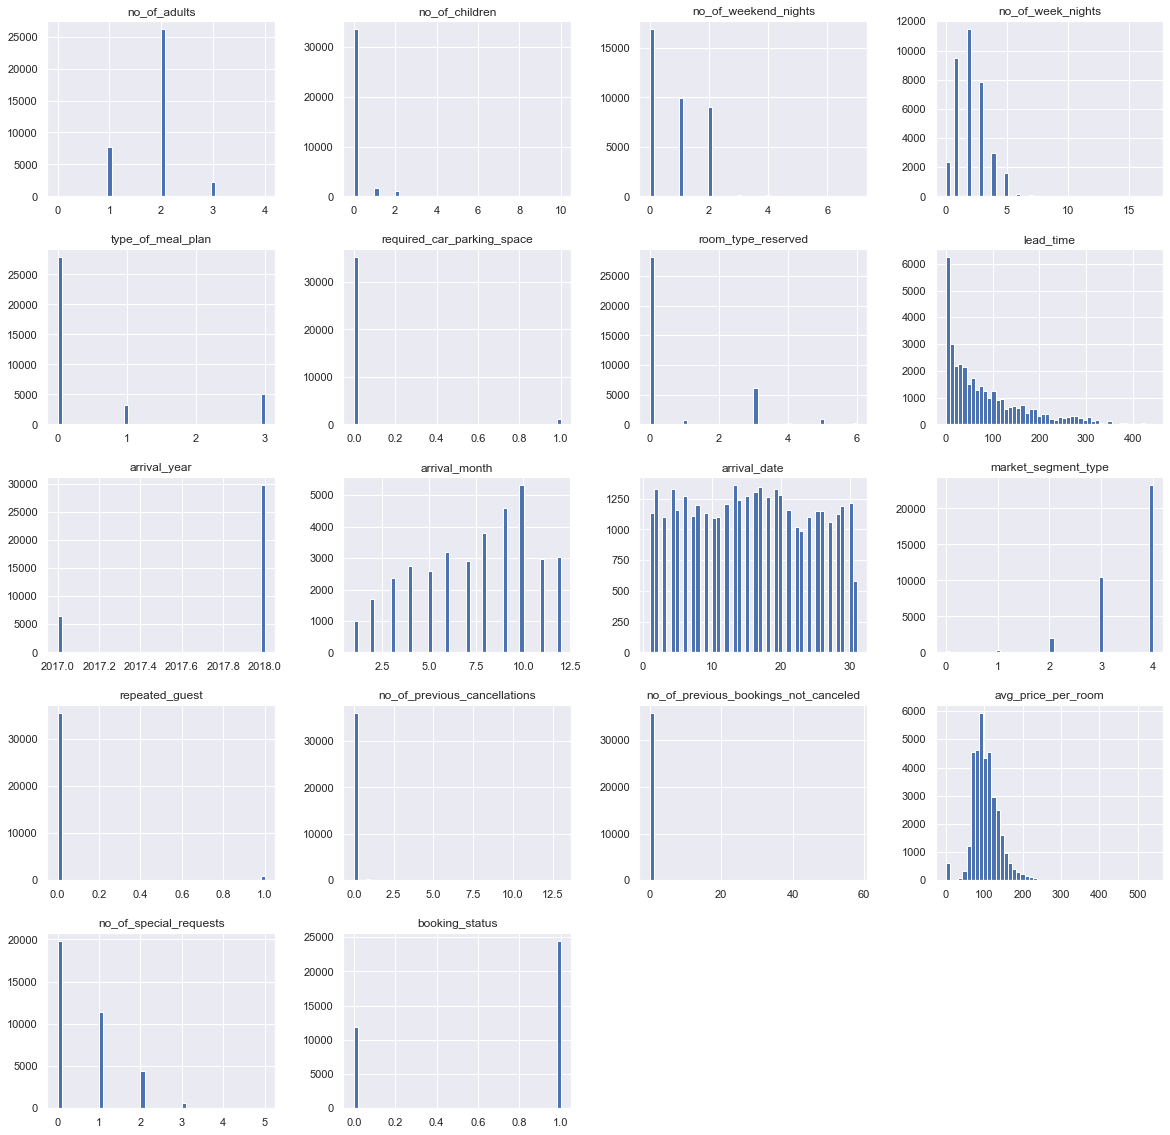

In [124]:
# plot histograms for all columns
data3.hist(bins=50, figsize=(20,20))
plt.show()

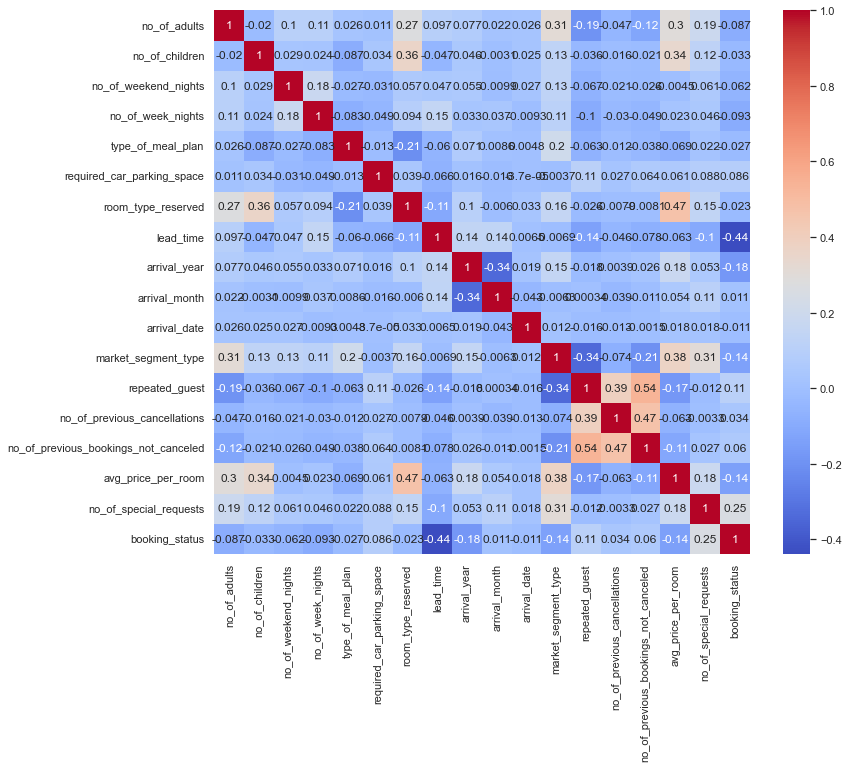

In [119]:
# calculate the correlation matrix
corr = data3.corr()

# plot the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [8]:
#Assining the X and y values
#since Booking_ID is not important in predicting, we can exclude it.

X = data2.iloc[:, 1:-1].values
y = data2.iloc[:, -1].values

In [89]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [129]:
print(X_train)

[[ 0.30130947 -0.26152271  1.36539421 ... -0.09019054 -0.50139382
  -0.7861337 ]
 [ 0.30130947 -0.26152271 -0.93030336 ... -0.09019054 -0.2399369
  -0.7861337 ]
 [ 0.30130947 -0.26152271  0.21754543 ... -0.09019054 -0.38280953
  -0.7861337 ]
 ...
 [ 2.2349673  -0.26152271 -0.93030336 ... -0.09019054  0.76160025
   0.48730197]
 [-1.63234837 -0.26152271 -0.93030336 ... -0.09019054 -1.1028876
  -0.7861337 ]
 [ 0.30130947 -0.26152271 -0.93030336 ... -0.09019054  0.17410799
   0.48730197]]


In [90]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
# train a random forest regressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [92]:
model.predict([[2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106,1]])

array([0.18])

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [93]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

In [94]:
#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [95]:
#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [96]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [97]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [141]:
#Training the ANN on the Training set
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
907/907 [==============================] - 2s 3ms/step - loss: 0.2884 - accuracy: 0.8719
Epoch 2/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2883 - accuracy: 0.8724
Epoch 3/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2885 - accuracy: 0.8716
Epoch 4/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2878 - accuracy: 0.8729
Epoch 5/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2875 - accuracy: 0.8719
Epoch 6/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.8717
Epoch 7/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.8715
Epoch 8/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2875 - accuracy: 0.8716
Epoch 9/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2874 - accuracy: 0.8726
Epoch 10/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2865 - accura

907/907 [==============================] - 2s 2ms/step - loss: 0.2761 - accuracy: 0.8778
Epoch 82/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2759 - accuracy: 0.8785
Epoch 83/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.8779
Epoch 84/100
907/907 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.8783
Epoch 85/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2756 - accuracy: 0.8786
Epoch 86/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2760 - accuracy: 0.8787
Epoch 87/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2765 - accuracy: 0.8772
Epoch 88/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.8795
Epoch 89/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.8775
Epoch 90/100
907/907 [==============================] - 2s 2ms/step - loss: 0.2756 - accuracy: 

Use our ANN model to predict if the customer with the following informations will cancel the booking or not: 

no_of_adults: 2

no_of_children: 1

no_of_weekend_nights: 2

no_of_week_nights: 2

type_of_meal_plan: 1

required_car_parking_space: 1

room_type_reserved: 1

lead_time :200

arrival_year: 2018

arrival_month: 6

arrival_date: 5

market_segment_type: 4

repeated_guest: 1

no_of_previous_cancellations: 0

no_of_previous_bookings_not_canceled: 0

avg_price_per_room: 120

no_of_special_requests:1	

True is that the customer will not cancelled

false for that customer is going to cancel the booking



In [139]:
#Making the predictions and evaluating the model
print(ann.predict(sc.transform([[2,1,2,2,1,1,1,200,2018,6,5,4,1,0,0,120,1]])) > 0.6)
print(ann.predict(sc.transform([[1,1,1,2,0,0,0,2,2018,10,2,3,0,1,0,105,0]])) > 0.6)
print(ann.predict(sc.transform([[2,0,2,3,0,1,0,224,2017,10,2,3,0,0,0,66,1]])) > 0.6)
print(ann.predict(sc.transform([[2,0,1,2,0,0,0,224,2018,4,5,1,0,1,0,98,0]])) > 0.6)
print(ann.predict(sc.transform([[2,0,1,2,0,0,1,224,2017,6,2,3,0,0,0,200,0]])) > 0.6)

1/1 [==============================] - 0s 31ms/step
[[ True]]
1/1 [==============================] - 0s 28ms/step
[[ True]]
1/1 [==============================] - 0s 36ms/step
[[ True]]
1/1 [==============================] - 0s 42ms/step
[[False]]
1/1 [==============================] - 0s 39ms/step
[[False]]


In [100]:
#Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

227/227 [==============================] - 0s 1ms/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


In [101]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1783  618]
 [ 377 4477]]


0.8628532046864231

In [111]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_predict=knn.predict(X_test)

C:\Users\91966\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
accuracy = accuracy_score(y_test,y_predict)
f1 = f1_score(y_test,y_knn)
precision = precision_score(y_test,y_knn)
recall = recall_score(y_test,y_knn)
results = pd.DataFrame([['KNN', accuracy, f1, precision, recall]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.850724,0.890661,0.873292,0.908735


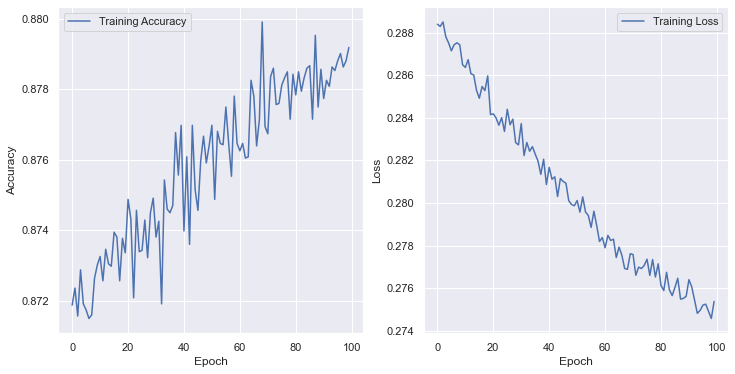

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
#ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='Training Loss')
#ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()